<a href="https://colab.research.google.com/github/gaiecks/Analise_Dados_Python/blob/main/An%C3%A1lise_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos analisar um conjunto de dados de gastos em Supermercado, obtido na plataforma kaggle.com.

O conjunto traz dados de 3 filiais de supermercado em cidades diferentes, representados por A, B e C.

O objetivo é fazer algumas constatações, análises simples e insights para identificar como o faturamento das 3 filiais se comporta em relação as linhas de produto, gênero, forma de pagamento e etc.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#importando o conjunto de dados e exibindo as 10 primeiras linhas para visualzar a estrutura do dataset.

df=pd.read_csv("/content/drive/MyDrive/análise de dados/supermarket_sales - Sheet1.csv")
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [5]:
#verificando todas as colunas do dataset
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Vamos iniciar analisando o faturamento por Filial:

Branch
A    106200.37
B    106197.67
C    110568.71
Name: Total, dtype: float64


[Text(0, 0, '106200'), Text(0, 0, '106198'), Text(0, 0, '110569')]

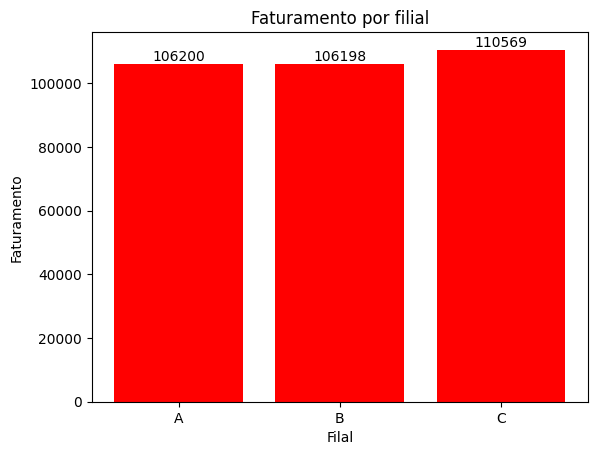

In [6]:
# Agrupando os dados por filial e somando o total de cada grupo
faturamento_por_filial = df.groupby('Branch')['Total'].sum()

# Arredondando o faturamento para 2 casas decimais
faturamento_por_filial = faturamento_por_filial.round(2)

# Exibir o faturamento por filial
print(faturamento_por_filial)

#construindo um gráfico de barras
barras = plt.bar(faturamento_por_filial.index, faturamento_por_filial.values, color=['red'])
plt.xlabel('Filal')
plt.ylabel('Faturamento')
plt.title('Faturamento por filial')
plt.bar_label(barras)




Agora vamos entender o faturamento por filial ao longo dos meses:

Month          1         2         3
Branch                              
A       38681.13  29860.12  37659.12
B       37176.06  34424.27  34597.34
C       40434.68  32934.98  37199.04


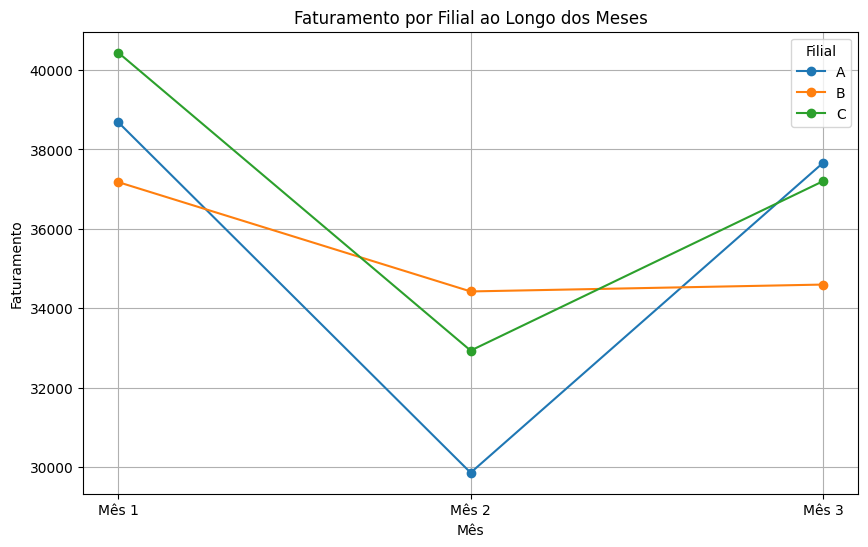

In [7]:
# Convertendo a coluna 'Date' para o tipo de dados de data
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

# Agrupando os dados por 'Branch' (Filial) e 'Year' e somando os totais
faturamento_por_filial_mes = df.groupby(['Branch', 'Month'])['Total'].sum().unstack(fill_value=0)

# Arredondando os valores para duas casas decimais
faturamento_por_filial_mes = faturamento_por_filial_mes.round(2)

print(faturamento_por_filial_mes)


# Foi necessário Transpor a tabela para que as filiais se tornem índices e os meses se tornem colunas
faturamento_por_filial_mes_transposto = faturamento_por_filial_mes.T

# Plotar o gráfico de linha
faturamento_por_filial_mes_transposto.plot(kind='line', marker='o', figsize=(10, 6))

plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.title('Faturamento por Filial ao Longo dos Meses')
plt.legend(title='Filial')
plt.xticks(range(1, 4), ['Mês 1', 'Mês 2', 'Mês 3'])
plt.grid(True)  # Adiciona grade ao gráfico
plt.show()






Podemos observar que no mês 2 todas as filiais apresentaram uma queda no faturamento. Entretanto, as filiais A e C conseguiram recuperar em partes seu faturamento, enquanto a filial B se manteve no mesmo patamar do mês 2, indicando uma defasagem em relação as demais filiais.


Vamos tentar entender o faturamento do ponto de vista de linhas de produto. O objetivo é tentar diagnosticar quais linhas vendem mais e quais vendem menos e se há uma variação muito grande ao longo do período.

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Branch                                                                          
A                           18317.11             16332.51            17163.10   
B                           17051.44             16413.32            15214.89   
C                           18968.97             21560.07            23766.86   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Branch                                                                  
A                      12597.75            22417.20           19372.70  
B                      19980.66            17549.16           19988.20  
C                      16615.33            13895.55           15761.93  


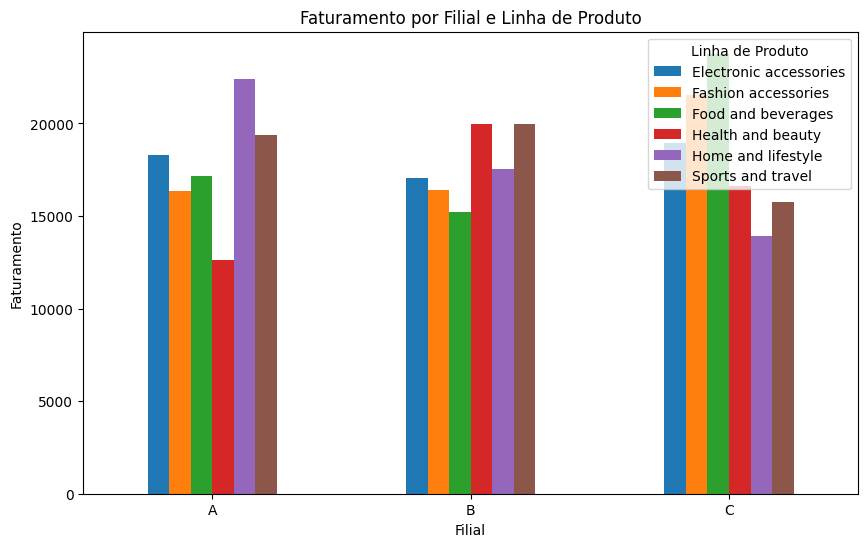

In [8]:
tabela_faturamento_filial = df.groupby(['Branch', 'Product line'])['Total'].sum().unstack(fill_value=0)

tabela_faturamento_filial = tabela_faturamento_filial.round(2)

print(tabela_faturamento_filial)

#Plotando um gráfico de barras
tabela_faturamento_filial.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Filial')
plt.ylabel('Faturamento')
plt.title('Faturamento por Filial e Linha de Produto')
plt.legend(title='Linha de Produto')
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.show()




Para refinar a análise, vamos observar o faturamento por linha de produto, por mês e por filial:

In [9]:
# Filtrar os dados apenas para a filial A
dados_filial_A = df[df['Branch'] == 'A']

# Agrupar os dados por mês e linha de produto e somar os totais
faturamento_por_linha_produto_mes_A = dados_filial_A.groupby(['Product line', 'Month'])['Total'].sum().unstack(fill_value=0)

# Adicionar uma coluna com o total dos valores para cada linha de produto
faturamento_por_linha_produto_mes_A['Total'] = faturamento_por_linha_produto_mes_A.sum(axis=1)

# Adicionar uma linha com a soma dos totais para cada mês
faturamento_por_linha_produto_mes_A.loc['Total'] = faturamento_por_linha_produto_mes_A.sum()

# Arredondar os valores para duas casas decimais
faturamento_por_linha_produto_mes_A = faturamento_por_linha_produto_mes_A.round(2)

print("Filial A:")
print(faturamento_por_linha_produto_mes_A)
print()

# Filtrar os dados apenas para a filial B
dados_filial_B = df[df['Branch'] == 'B']

# Agrupar os dados por mês e linha de produto e somar os totais
faturamento_por_linha_produto_mes_B = dados_filial_B.groupby(['Product line', 'Month'])['Total'].sum().unstack(fill_value=0)

# Adicionar uma coluna com o total dos valores para cada linha de produto
faturamento_por_linha_produto_mes_B['Total'] = faturamento_por_linha_produto_mes_B.sum(axis=1)

# Adicionar uma linha com a soma dos totais para cada mês
faturamento_por_linha_produto_mes_B.loc['Total'] = faturamento_por_linha_produto_mes_B.sum()

# Arredondar os valores para duas casas decimais
faturamento_por_linha_produto_mes_B = faturamento_por_linha_produto_mes_B.round(2)

print("Filial B:")
print(faturamento_por_linha_produto_mes_B)
print()

# Filtrar os dados apenas para a filial C
dados_filial_C = df[df['Branch'] == 'C']

# Agrupar os dados por mês e linha de produto e somar os totais
faturamento_por_linha_produto_mes_C = dados_filial_C.groupby(['Product line', 'Month'])['Total'].sum().unstack(fill_value=0)

# Adicionar uma coluna com o total dos valores para cada linha de produto
faturamento_por_linha_produto_mes_C['Total'] = faturamento_por_linha_produto_mes_C.sum(axis=1)

# Adicionar uma linha com a soma dos totais para cada mês
faturamento_por_linha_produto_mes_C.loc['Total'] = faturamento_por_linha_produto_mes_C.sum()

# Arredondar os valores para duas casas decimais
faturamento_por_linha_produto_mes_C = faturamento_por_linha_produto_mes_C.round(2)

print("Filial C:")
print(faturamento_por_linha_produto_mes_C)





Filial A:
Month                          1         2         3      Total
Product line                                                   
Electronic accessories   6401.27   5202.77   6713.07   18317.11
Fashion accessories      6847.49   5173.63   4311.38   16332.51
Food and beverages       4646.23   7054.23   5462.65   17163.10
Health and beauty        3962.60   2915.48   5719.68   12597.75
Home and lifestyle      10313.59   4771.63   7331.97   22417.20
Sports and travel        6509.95   4742.38   8120.37   19372.70
Total                   38681.13  29860.12  37659.12  106200.37

Filial B:
Month                          1         2         3      Total
Product line                                                   
Electronic accessories   6699.78   6686.25   3665.41   17051.44
Fashion accessories      6112.60   6137.11   4163.61   16413.32
Food and beverages       6609.28   5554.82   3050.80   15214.89
Health and beauty        6399.89   5856.43   7724.35   19980.66
Home and lifestyle 

A Filial A teve um desempenho estável com flutuações em algumas categorias, sendo "Home and Lifestyle" e "Sports and Travel" as mais destacadas.
Filial B apresentou consistência nas vendas de "Fashion Accessories" e um aumento notável em "Health and Beauty" no terceiro mês.
Filial C destacou-se em "Food and Beverages" e "Fashion Accessories", com um desempenho crescente ao longo dos meses.



Agora vamos tentar incluir o gênero nas análises.

Gender                    Female      Male
Product line                              
Electronic accessories  27102.02  27235.51
Fashion accessories     30437.40  23868.50
Food and beverages      33170.92  22973.93
Health and beauty       18560.99  30632.75
Home and lifestyle      30036.88  23825.04
Sports and travel       28574.72  26548.11


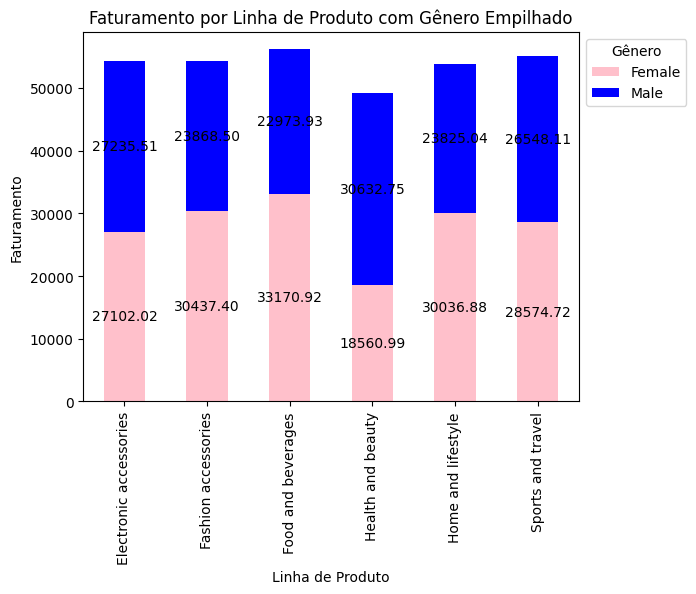

In [10]:
# Agrupando por 'Gender' e 'Product line' e somando os gastos
gastos_por_genero_produto = df.groupby(['Product line', 'Gender'])['Total'].sum().unstack().apply(lambda x: round(x, 2))
print(gastos_por_genero_produto)

# Definindo cores para os gêneros
cores = {'Male': 'blue', 'Female': 'pink'}

# Plotando um gráfico de barras empilhadas com cores diferentes para cada gênero
ax = gastos_por_genero_produto.plot(kind='bar', stacked=True, color=[cores[col] for col in gastos_por_genero_produto.columns])

plt.xlabel('Linha de Produto')
plt.ylabel('Faturamento')
plt.title('Faturamento por Linha de Produto com Gênero Empilhado')
plt.legend(title='Gênero', bbox_to_anchor=(1, 1))

# Adicionando rótulos nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()




Observamos certa paridade de gastos entre os gêneros de forma geral. Entretanto, evidencia-se de forma interessante que os gastos com "Health and beauty" são expressivamente maiores no público masculino. Já nos grupos "Fashion accessories", "Food and beverages" e "Home and lifestyle" a expressividade é maior no público feminino.

Para mais detalhamento de informações, vamos verificar o padrão de consumo por filiais e por mês considerando os gêneros "Male" e "Female":

In [11]:
# Filtrar os dados apenas para a filial A
dados_filial_A = df[df['Branch'] == 'A']
faturamento_por_genero_mes_A = dados_filial_A.groupby(['Gender', 'Month'])['Total'].sum().unstack(fill_value=0)
faturamento_por_genero_mes_A['Total'] = faturamento_por_genero_mes_A.sum(axis=1)
faturamento_por_genero_mes_A.loc['Total'] = faturamento_por_genero_mes_A.sum()
faturamento_por_genero_mes_A = faturamento_por_genero_mes_A.round(2)

print("Filial A:")
print(faturamento_por_genero_mes_A)
print()

# Filtrar os dados apenas para a filial B
dados_filial_B = df[df['Branch'] == 'B']
faturamento_por_genero_mes_B = dados_filial_B.groupby(['Gender', 'Month'])['Total'].sum().unstack(fill_value=0)
faturamento_por_genero_mes_B['Total'] = faturamento_por_genero_mes_B.sum(axis=1)
faturamento_por_genero_mes_B.loc['Total'] = faturamento_por_genero_mes_B.sum()
faturamento_por_genero_mes_B = faturamento_por_genero_mes_B.round(2)

print("Filial B:")
print(faturamento_por_genero_mes_B)
print()

# Filtrar os dados apenas para a filial C
dados_filial_C = df[df['Branch'] == 'C']
faturamento_por_genero_mes_C = dados_filial_C.groupby(['Gender', 'Month'])['Total'].sum().unstack(fill_value=0)
faturamento_por_genero_mes_C['Total'] = faturamento_por_genero_mes_C.sum(axis=1)
faturamento_por_genero_mes_C.loc['Total'] = faturamento_por_genero_mes_C.sum()
faturamento_por_genero_mes_C = faturamento_por_genero_mes_C.round(2)

print("Filial C:")
print(faturamento_por_genero_mes_C)


Filial A:
Month          1         2         3      Total
Gender                                         
Female  17419.94  15751.53  20097.69   53269.17
Male    21261.19  14108.59  17561.43   52931.20
Total   38681.13  29860.12  37659.12  106200.37

Filial B:
Month          1         2         3      Total
Gender                                         
Female  18501.08  19676.87  14750.34   52928.30
Male    18674.97  14747.40  19847.01   53269.38
Total   37176.06  34424.27  34597.34  106197.67

Filial C:
Month          1         2         3      Total
Gender                                         
Female  23217.96  20907.15  17560.36   61685.46
Male    17216.72  12027.83  19638.69   48883.24
Total   40434.68  32934.98  37199.04  110568.71


Nas Filiais A e B, obseramos uma paridade de consumo entre os gêneros com flutuações que se alternam em alguns meses. Já na filial C vemos uma tendência maior de gastos do público feminino, o que corrobora com os dados da análise anterior que demonstra que o público feminino é maior em Foods and Beverages e Fashion Acessories, categorias fortes na filial C.

Nas seções abaixo faremos algumas análises de correlação entre o total de gastos e a variável gênero. Será atribuido o valor 0 para Male e 1 para Female para que a correlação possa ser estabelecida.

In [22]:
# Filtrar os dados apenas para a filial A
df_a = df[df['Branch'] == 'A'].copy()  # Utiliza-se .copy() para evitar a visualização

# É necessário converter a coluna Gender para valores numéricos
df_a.loc[:, 'Gender_Num'] = df_a['Gender'].map({'Male': 0, 'Female': 1})

# Calcular a correlação entre Gender_Num e Total para a filial A
correlation_a = df_a['Gender_Num'].corr(df_a['Total'])
print(f"Correlação entre Gender e Total para a filial A: {correlation_a:.2f}")


# Filtrar os dados apenas para a filial B
df_b = df[df['Branch'] == 'B'].copy()

df_b.loc[:, 'Gender_Num'] = df_b['Gender'].map({'Male': 0, 'Female': 1})

correlation_b = df_b['Gender_Num'].corr(df_b['Total'])
print(f"Correlação entre Gender e Total para a filial B: {correlation_b:.2f}")


# Filtrar os dados apenas para a filial C
df_c = df[df['Branch'] == 'C'].copy()

df_c.loc[:, 'Gender_Num'] = df_c['Gender'].map({'Male': 0, 'Female': 1})

correlation_c = df_c['Gender_Num'].corr(df_c['Total'])
print(f"Correlação entre Gender e Total para a filial C: {correlation_c:.2f}")


# Calcular a correlação entre Gender_Num e Total
df.loc[:, 'Gender_Num'] = df['Gender'].map({'Male': 0, 'Female': 1})
correlation = df['Gender_Num'].corr(df['Total'])
print(f"Correlação entre Gender e Total geral para todas as filiais: {correlation:.2f}")




Correlação entre Gender e Total para a filial A: 0.08
Correlação entre Gender e Total para a filial B: 0.03
Correlação entre Gender e Total para a filial C: 0.04
Correlação entre Gender e Total geral para todas as filiais: 0.05


In [23]:
# Calcular a correlação entre Gender_Num e Total para cada mês na filial A
for month in range(1, 4):
    correlation_a_month = df_a[df_a['Month'] == month]['Gender_Num'].corr(df_a[df_a['Month'] == month]['Total'])
    print(f"Correlação entre Gender e Total para a filial A no mês {month}: {correlation_a_month:.2f}")

# Calcular a correlação entre Gender_Num e Total para cada mês na filial B
for month in range(1, 4):
    correlation_b_month = df_b[df_b['Month'] == month]['Gender_Num'].corr(df_b[df_b['Month'] == month]['Total'])
    print(f"Correlação entre Gender e Total para a filial B no mês {month}: {correlation_b_month:.2f}")

# Calcular a correlação entre Gender_Num e Total para cada mês na filial C
for month in range(1, 4):
    correlation_c_month = df_c[df_c['Month'] == month]['Gender_Num'].corr(df_c[df_c['Month'] == month]['Total'])
    print(f"Correlação entre Gender e Total para a filial C no mês {month}: {correlation_c_month:.2f}")


Correlação entre Gender e Total para a filial A no mês 1: 0.06
Correlação entre Gender e Total para a filial A no mês 2: 0.04
Correlação entre Gender e Total para a filial A no mês 3: 0.12
Correlação entre Gender e Total para a filial B no mês 1: -0.07
Correlação entre Gender e Total para a filial B no mês 2: 0.19
Correlação entre Gender e Total para a filial B no mês 3: -0.03
Correlação entre Gender e Total para a filial C no mês 1: 0.06
Correlação entre Gender e Total para a filial C no mês 2: 0.06
Correlação entre Gender e Total para a filial C no mês 3: 0.00


A análise das correlações entre o gênero do cliente e o total de vendas em cada filial revela insights significativos sobre os padrões de compra. Embora haja alguma associação entre o gênero e as vendas, essa relação é leve e variável. Na Filial A, observamos uma correlação positiva, indicando uma tendência sutil de gastos mais elevados por determinado gênero em diferentes meses. No entanto, a Filial B apresenta resultados mais complexos, com uma correlação negativa no primeiro mês seguida por uma correlação positiva acentuada no segundo mês e novamente uma correlação negativa leve no terceiro mês. Essa flutuação sugere uma dinâmica distinta de compra entre os gêneros ao longo do tempo. Na Filial C, as correlações positivas consistentes nos dois primeiros meses contrastam com uma correlação próxima a zero no terceiro mês, destacando a necessidade de análises mais aprofundadas para compreender as nuances desses padrões. No geral, esses resultados ressaltam a importância de considerar uma variedade de fatores além do gênero do cliente ao desenvolver estratégias de vendas e marketing, reconhecendo que o comportamento do consumidor é multifacetado e pode ser influenciado por uma interação complexa de variáveis.

Agora vamos ver um diagnóstico do perfil do consumidor em relação a ser membro ou não da filial (efetua compras com o cartão fidelidade da loja):

In [12]:
# Filtrar os dados apenas para a filial A
dados_filial_A = df[df['Branch'] == 'A']
faturamento_por_cliente_mes_A = dados_filial_A.groupby(['Customer type', 'Month'])['Total'].sum().unstack(fill_value=0)
faturamento_por_cliente_mes_A['Total'] = faturamento_por_cliente_mes_A.sum(axis=1)
faturamento_por_cliente_mes_A.loc['Total'] = faturamento_por_cliente_mes_A.sum()
faturamento_por_cliente_mes_A = faturamento_por_cliente_mes_A.round(2)

print("Filial A:")
print(faturamento_por_cliente_mes_A)
print()

# Filtrar os dados apenas para a filial B
dados_filial_B = df[df['Branch'] == 'B']
faturamento_por_cliente_mes_B = dados_filial_B.groupby(['Customer type', 'Month'])['Total'].sum().unstack(fill_value=0)
faturamento_por_cliente_mes_B['Total'] = faturamento_por_cliente_mes_B.sum(axis=1)
faturamento_por_cliente_mes_B.loc['Total'] = faturamento_por_cliente_mes_B.sum()
faturamento_por_cliente_mes_B = faturamento_por_cliente_mes_B.round(2)

print("Filial B:")
print(faturamento_por_cliente_mes_B)
print()

# Filtrar os dados apenas para a filial C
dados_filial_C = df[df['Branch'] == 'C']
faturamento_por_cliente_mes_C = dados_filial_C.groupby(['Customer type', 'Month'])['Total'].sum().unstack(fill_value=0)
faturamento_por_cliente_mes_C['Total'] = faturamento_por_cliente_mes_C.sum(axis=1)
faturamento_por_cliente_mes_C.loc['Total'] = faturamento_por_cliente_mes_C.sum()
faturamento_por_cliente_mes_C = faturamento_por_cliente_mes_C.round(2)

print("Filial C:")
print(faturamento_por_cliente_mes_C)


Filial A:
Month                 1         2         3      Total
Customer type                                         
Member         20198.05  15973.41  17466.02   53637.48
Normal         18483.08  13886.71  20193.11   52562.90
Total          38681.13  29860.12  37659.12  106200.37

Filial B:
Month                 1         2         3      Total
Customer type                                         
Member         18568.72  17156.94  17979.02   53704.69
Normal         18607.33  17267.33  16618.32   52492.99
Total          37176.06  34424.27  34597.34  106197.67

Filial C:
Month                 1         2         3      Total
Customer type                                         
Member         19148.05  17165.70  20567.53   56881.28
Normal         21286.63  15769.28  16631.52   53687.42
Total          40434.68  32934.98  37199.04  110568.71


Nas 3 filiais observamos uma distribuição bem parelha no tipo de cliente (membro ou cliente normal), o que demonstra certa fraqueza no programa de membros dos estabelecimentos que aparentemente não incentiva ou não dá atrativos pros clientes fazerem parte. Seria necessário verificar os custos do programa e averiguar se vale a pena acabar com o programa ou se for manter, criar estratégias para expandi-lo.

Para finalizar, vamos observar a distribuição do faturamento por tipo de pagamento, por loja:

In [13]:
# Filtrar os dados apenas para a filial A
dados_filial_A = df[df['Branch'] == 'A']
faturamento_por_pagamento_mes_A = dados_filial_A.groupby(['Payment', 'Month'])['Total'].sum().unstack(fill_value=0)
faturamento_por_pagamento_mes_A['Total'] = faturamento_por_pagamento_mes_A.sum(axis=1)
faturamento_por_pagamento_mes_A.loc['Total'] = faturamento_por_pagamento_mes_A.sum()
faturamento_por_pagamento_mes_A = faturamento_por_pagamento_mes_A.round(2)

print("Filial A:")
print(faturamento_por_pagamento_mes_A)
print()

# Filtrar os dados apenas para a filial B
dados_filial_B = df[df['Branch'] == 'B']
faturamento_por_pagamento_mes_B = dados_filial_B.groupby(['Payment', 'Month'])['Total'].sum().unstack(fill_value=0)
faturamento_por_pagamento_mes_B['Total'] = faturamento_por_pagamento_mes_B.sum(axis=1)
faturamento_por_pagamento_mes_B.loc['Total'] = faturamento_por_pagamento_mes_B.sum()
faturamento_por_pagamento_mes_B = faturamento_por_pagamento_mes_B.round(2)

print("Filial B:")
print(faturamento_por_pagamento_mes_B)
print()

# Filtrar os dados apenas para a filial C
dados_filial_C = df[df['Branch'] == 'C']
faturamento_por_pagamento_mes_C = dados_filial_C.groupby(['Payment', 'Month'])['Total'].sum().unstack(fill_value=0)
faturamento_por_pagamento_mes_C['Total'] = faturamento_por_pagamento_mes_C.sum(axis=1)
faturamento_por_pagamento_mes_C.loc['Total'] = faturamento_por_pagamento_mes_C.sum()
faturamento_por_pagamento_mes_C = faturamento_por_pagamento_mes_C.round(2)

print("Filial C:")
print(faturamento_por_pagamento_mes_C)


Filial A:
Month               1         2         3      Total
Payment                                             
Cash         12050.65  10696.38  11034.22   33781.25
Credit card  12091.65   9572.20  11430.90   33094.75
Ewallet      14538.82   9591.54  15194.00   39324.37
Total        38681.13  29860.12  37659.12  106200.37

Filial B:
Month               1         2         3      Total
Payment                                             
Cash         11921.69  14251.76   9166.02   35339.46
Credit card  16188.60  10234.86  10921.40   37344.86
Ewallet       9065.77   9937.65  14509.93   33513.35
Total        37176.06  34424.27  34597.34  106197.67

Filial C:
Month               1         2         3      Total
Payment                                             
Cash         17797.74  10798.20  14489.92   43085.86
Credit card   9966.33  11552.96   8808.18   30327.46
Ewallet      12670.61  10583.82  13900.95   37155.38
Total        40434.68  32934.98  37199.04  110568.71


Observamos flutuações no padrão de pagamento dos clientes, entretanto ao considerar o período todo, na Filial A a predominância é no pagamento por Ewallets, na filial B por credit card e na filial C pagamentos em dinheiro.

De modo geral, observamos dados pouco discrepantes dentro dos cenários avaliados, com alguns insights importantes referentes ao padrão de consumo das lojas que podem ser eficientes para se criar ou melhorar estratégias de marketing do estabelecimento. O intuito deste trabalho não era aprofundar muito nas análises mas sim demonstrar, através de constatações, alguns códigos e ferramentas básicas da linguagem Python que podem ser úteis para análise de dados.